In [1]:
# Plots for Optics Letter
import matplotlib.pyplot as plt
plt.style.use('huntstone')
import numpy as np
import sys
sys.path.insert(0, "../../python")
from plotting import makefig
import eo_signal as eos
import currents as cp

In [2]:
# Some constants
y0 = 800e-9
tp = 30e-15
r0 = 1e-3
d  = 100e-6
method = "cross"

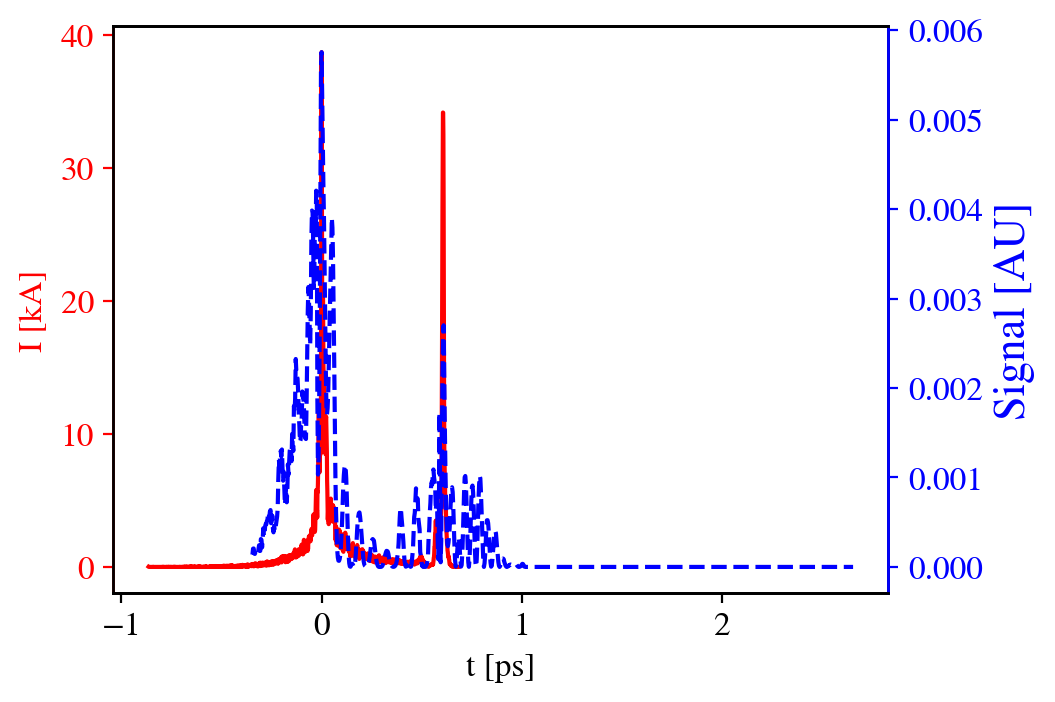

In [3]:
# Longitudinal signal example
ind = 0
psi = 15
I, ti, sig, t_sig, gamma, t_gamma = eos.get_signal(ind, "GaP", d, y0, tp, psi, r0, method, plot = True)

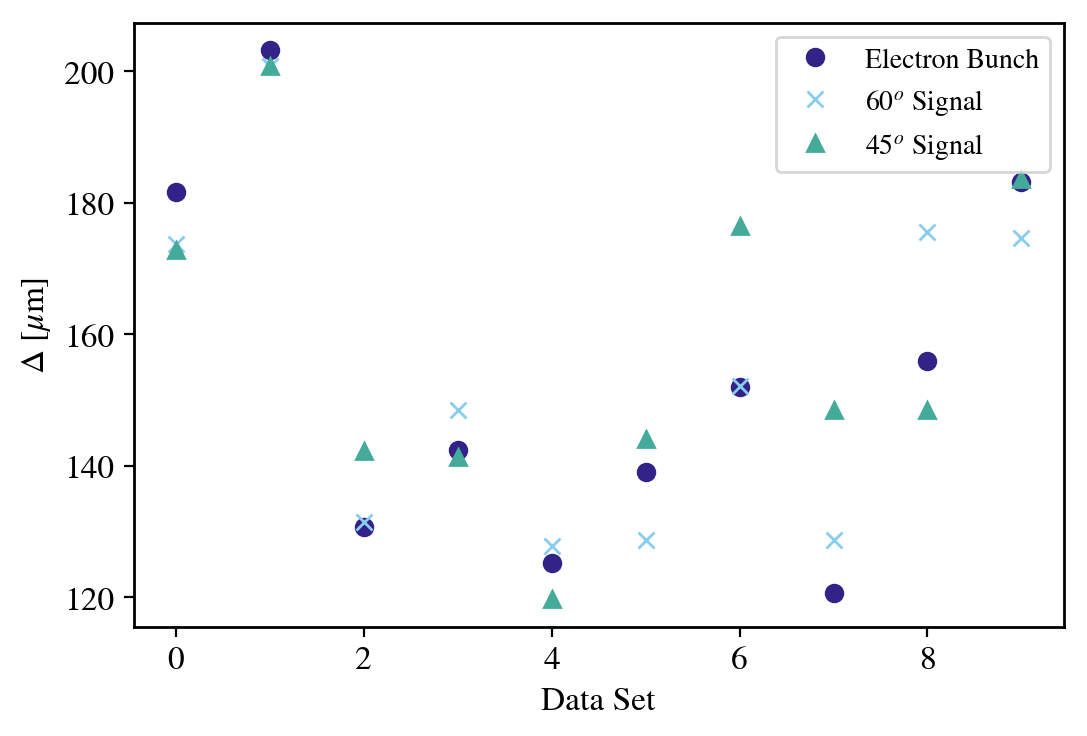

In [16]:
# Longitudinal peak to peak measurement accuracy
I_dz    = np.zeros(10)
S_dz_15 = np.zeros(10)
S_dz_45 = np.zeros(10)
avg     = np.zeros(10)
dt      = 0.4e-12
for i in range(10):
    I, ti, sig15, t_sig15, gamma, t_gamma = eos.get_signal(i, "GaP", d, y0, tp, 45, r0, method)
    I, ti, sig45, t_sig45, gamma, t_gamma = eos.get_signal(i, "GaP", d, y0, tp, 30, r0, method)
    I_dz[i], S_dz_15[i], dummy, dummy = eos.analyze_sig(I, sig15, ti, t_sig15, dt)
    dummy, S_dz_45[i], dummy, dummy = eos.analyze_sig(I, sig45, ti, t_sig45, dt)
    avg[i] = 0.5 * (S_dz_15[i] + S_dz_45[i])
fig, ax = makefig(xlab = "Data Set", ylab = r'$\Delta$ [$\mu$m]')
ax.plot(I_dz, 'o', label = "Electron Bunch")
ax.plot(S_dz_15, 'x', label = r'60$^o$ Signal')
ax.plot(S_dz_45, '^', label = r'45$^o$ Signal')
#ax.plot(avg, 's', label = "Average")
ax.legend()
plt.show()